### The Off-Switch Game
##### Dylan Hadfield-Menell, Anca Dragan, Pieter Abbeel, Stuart Russell
##### https://arxiv.org/pdf/1611.08219.pdf

[ Reproduction in progress ]

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
class Robot:    
    def belief(self, mean, sd): #B^R
        size = 1
        gaussian = np.random.normal(mean, sd, size)
        return gaussian
    
    def incentive(self, policy, mean, sd): # delta
        sum_wait = 0
        length = 10000
        Ua = []
        for i in range(length):
            Ua.append(self.belief(mean, sd))
        wait = sum([policy(U) * U for U in Ua])
        not_wait = max(sum(Ua), 0)
        sum_wait = wait - not_wait
        delta = sum_wait/length
        return delta[0]
    

In [7]:
class Human:                
    def policy(self,utility, rational=True): #pi
        if rational:
            if utility >= 0:
                return 1
            return 0
        return utility * np.random.normal(0.5, 0.25, 1) # irrational

In [8]:
r = Robot()
h = Human()

In [9]:
mean_0 = []
mean_75 = []
mean_n25 = []
iterations = 10
sds = []
for sd in range(iterations):
    adjusted_sd = sd/float(iterations)
    sds.append(adjusted_sd)
    mean_0.append(r.incentive(h.policy, 0, adjusted_sd))
    mean_75.append(r.incentive(h.policy, 0.75, adjusted_sd))
    mean_n25.append(r.incentive(h.policy, -0.25, adjusted_sd))
print(sds)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


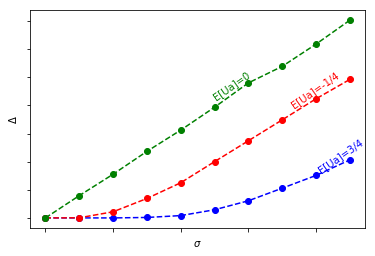

In [10]:
# plt.plot(ten, mean_0, "g^", ten,mean_34,"b^", ten, mean_n14, "r^")
fig,ax = plt.subplots(1)

ax.plot(mean_75,"bo--", mean_n25, "ro--", mean_0, "go--")
ax.text(4.9,0.25, 'E[Ua]=0', color='green', rotation=35)
ax.text(7.2,0.25, 'E[Ua]=-1/4', color='red', rotation=35)
ax.text(8,0.13, 'E[Ua]=3/4', color='blue', rotation=35)
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\Delta$')
plt.show()

Figure 2 (Left). Paper & Reproduction, respectively.
![](https://image.ibb.co/bRZUMa/Reproduction_f2.png)

In [ ]:
# Figure 2, Right

xlist = np.linspace(0, 1, 10)
ylist = np.linspace(-1, 1, 3)
X, Y = np.meshgrid(xlist, ylist)
Z = [mean_0, mean_n25, mean_75]
print(Z)
plt.figure()

mean_0_plt = np.full(2, 0)
mean_75_plt = np.full(2, 0.75)
mean_n25_plt = np.full(2, -0.25)

cp = plt.contourf(X, Y, Z, cmap='Greys')
bar = plt.colorbar(cp)
plt.xlabel(r'$\sigma$')
plt.ylabel('E[Ua]')
plt.xlim([0,1])
plt.plot(mean_75_plt,"bo--", mean_n25_plt, "ro--", mean_0_plt, "go--")


bar.set_label(r'$\Delta$')

plt.show()

# TODO: Tweak Matplotlib to create Right plot